### <center><h1>Universidad Externado de Colombia </center></h1>
#### <center><h1>Analisis de la Contratación Estatal en Diferentes Departamentos de Colombia </center></h1>
 

#### <center><h1> Anjely Amazo, Julieth Perea y Liliana Hernandez <center><h1> 

<img alt="" src="http://www.eafit.edu.co/cec/Documents/newsletter/img/julio2016/guia%20academica/Banner_Contratacion_Estatal.png" align="center" style="height: 80%;">
<div style="text-align: center;">

## Introduccion
A continuacion presentaremos un analisis del comportamiento de los departamentos en Colombia frente a la contratación estatal. Este analisis se hace con el objetivo de conocer el comportamiento de las diferentes variables que contiene la base de datos y presentar unas conclusiones finales que sirvan para conocer el comportamiento de los diferentes territorios

La fuente de nuestra base de datos la encontramos en el siguiente enlace:

 https://www.datos.gov.co/es/Gastos-Gubernamentales/SECOP-II-Contratos-Electr-nicos/jbjy-vk9h/data


A continuación se muestran las librerias que usaremos para el analisis:
    

In [1]:
#instalar librerias
import sodapy
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sodapy import Socrata


Descargamos la base completa de SECOP

In [3]:
usuario= 'lphernandezroa@hotmail.com'
pssw= '**********'

In [ ]:
client = Socrata('www.datos.gov.co',
                  'aPduKkjSfS3LatOJfLoDjhgpG',
                  username=usuario,
                  password=pssw)

# Returned as JSON from API / converted to Python list of dictionaries by sodapy.
results = client.get("jbjy-vk9h", limit=1500000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

### Haciendo un analisis preliminar de la base

In [11]:
display("Primeros 3 registros",results_df.head(3))


'Primeros 3 registros'

,anno_bpin,c_digo_bpin,ciudad,codigo_de_categoria_principal,codigo_entidad,codigo_proveedor,condiciones_de_entrega,departamento,descripcion_del_proceso,destino_gasto,...,ultima_actualizacion,urlproceso,valor_amortizado,valor_de_pago_adelantado,valor_del_contrato,valor_facturado,valor_pagado,valor_pendiente_de,valor_pendiente_de_ejecucion,valor_pendiente_de_pago
0,2018,No Definido,Caldas,V1.80111601,704161553,708133640,Transporte incluido,Antioquia,prestar los servicios profesionales de carácte...,Funcionamiento,...,2020-12-31T00:00:00.000,{'url': 'https://community.secop.gov.co/Public...,0,0,36962200,36962200,36962200,0,0,0
1,2019,No Definido,Bogotá,V1.80111701,702730482,703349027,A convenir,Distrito Capital de Bogotá,PRESTAR SERVICIOS DE APOYO A LA GESTION ASISTE...,Funcionamiento,...,2021-07-10T00:00:00.000,{'url': 'https://community.secop.gov.co/Public...,0,0,3100000,0,0,0,3100000,3100000
2,2021,2021666820035,Santa Rosa De Cabal,V1.80121601,705489250,715030144,A convenir,Risaralda,Prestación de servicios profesionales como abo...,Inversión,...,2021-11-03T00:00:00.000,{'url': 'https://community.secop.gov.co/Public...,0,0,7572000,0,0,0,7572000,7572000


In [12]:
display("3 últimos registros",results_df.tail(3))

'3 últimos registros'

,anno_bpin,c_digo_bpin,ciudad,codigo_de_categoria_principal,codigo_entidad,codigo_proveedor,condiciones_de_entrega,departamento,descripcion_del_proceso,destino_gasto,...,ultima_actualizacion,urlproceso,valor_amortizado,valor_de_pago_adelantado,valor_del_contrato,valor_facturado,valor_pagado,valor_pendiente_de,valor_pendiente_de_ejecucion,valor_pendiente_de_pago
1305588,2021,2020110010074,No Definido,V1.80111600,700367014,703566422,Como acordado previamente,Distrito Capital de Bogotá,PRESTAR SERVICIOS PERSONALES COMO MANIPULADOR ...,Inversión,...,2021-12-09T00:00:00.000,{'url': 'https://community.secop.gov.co/Public...,0,0,17199000,0,0,0,17199000,17199000
1305589,2021,2020520010086,Pasto,V1.80111600,700694094,711110635,A convenir,Nariño,La contratista se compromete para con el Munic...,Inversión,...,2021-10-04T00:00:00.000,{'url': 'https://community.secop.gov.co/Public...,0,0,3000000,0,0,0,3000000,3000000
1305590,2018,No Definido,Cali,V1.80111501,704025808,705463891,Como acordado previamente,Valle del Cauca,Prestar los servicios Profesionales con el fi...,Funcionamiento,...,2020-10-29T00:00:00.000,{'url': 'https://community.secop.gov.co/Public...,0,0,16879880,0,0,0,16879880,16879880


In [13]:
display("Columnas:",results_df.columns)

'Columnas:'

Index(['anno_bpin', 'c_digo_bpin', 'ciudad', 'codigo_de_categoria_principal',
       'codigo_entidad', 'codigo_proveedor', 'condiciones_de_entrega',
       'departamento', 'descripcion_del_proceso', 'destino_gasto',
       'dias_adicionados', 'documento_proveedor', 'entidad_centralizada',
       'es_grupo', 'es_pyme', 'espostconflicto', 'estado_bpin',
       'estado_contrato', 'fecha_de_fin_de_ejecucion',
       'fecha_de_fin_del_contrato', 'fecha_de_firma',
       'fecha_de_inicio_de_ejecucion', 'fecha_de_inicio_del_contrato',
       'fecha_fin_liquidacion', 'fecha_inicio_liquidacion',
       'g_nero_representante_legal', 'habilita_pago_adelantado', 'id_contrato',
       'identificaci_n_representante_legal', 'justificacion_modalidad_de',
       'liquidaci_n', 'localizaci_n', 'modalidad_de_contratacion',
       'nacionalidad_representante_legal', 'nit_entidad', 'nombre_entidad',
       'nombre_representante_legal', 'obligaci_n_ambiental',
       'obligaciones_postconsumo', 'orden', 'or

In [6]:
display("Índices:",results_df.index)

'Índices:'

RangeIndex(start=0, stop=1305591, step=1)

In [15]:
display("Tipos de registros en el DataFrame",results_df.dtypes)

'Tipos de registros en el DataFrame'

anno_bpin                                                           object
c_digo_bpin                                                         object
ciudad                                                              object
codigo_de_categoria_principal                                       object
codigo_entidad                                                      object
codigo_proveedor                                                    object
condiciones_de_entrega                                              object
departamento                                                        object
descripcion_del_proceso                                             object
destino_gasto                                                       object
dias_adicionados                                                    object
documento_proveedor                                                 object
entidad_centralizada                                                object
es_grupo                 

In [16]:
display("Muestra aleatoria de 3 registros",results_df.sample(3))

'Muestra aleatoria de 3 registros'

,anno_bpin,c_digo_bpin,ciudad,codigo_de_categoria_principal,codigo_entidad,codigo_proveedor,condiciones_de_entrega,departamento,descripcion_del_proceso,destino_gasto,...,ultima_actualizacion,urlproceso,valor_amortizado,valor_de_pago_adelantado,valor_del_contrato,valor_facturado,valor_pagado,valor_pendiente_de,valor_pendiente_de_ejecucion,valor_pendiente_de_pago
207496,2021,2017011000189,Bogotá,V1.77101801,700696065,701116006,Como acordado previamente,Distrito Capital de Bogotá,PRESTAR LOS SERVICIOS PROFESIONALES PARA REALI...,Inversión,...,2021-11-08T00:00:00.000,{'url': 'https://community.secop.gov.co/Public...,0,0,31000000,0,0,0,31000000,31000000
824953,2020,2017004540382,Cúcuta,V1.81101500,709391528,711082362,Como acordado previamente,Norte de Santander,EL CONTRATISTA SE OBLIGA PARA CON EL DEPARTAME...,Inversión,...,2021-12-10T00:00:00.000,{'url': 'https://community.secop.gov.co/Public...,0,0,9600000,9600000,9600000,0,9600000,0
733106,2020,11001000001190,No Definido,V1.80111500,701993388,708782222,Como acordado previamente,Distrito Capital de Bogotá,Prestar servicios técnicos en la Dirección de ...,Inversión,...,2020-10-08T00:00:00.000,{'url': 'https://community.secop.gov.co/Public...,0,0,17919498,0,0,0,17919498,17919498


In [17]:
display("dimensión",results_df.shape)

'dimensión'

(1305591, 70)

### Haciendo un analísis exploratorio de los datos

In [10]:
print(results_df["estado_contrato"].value_counts())

En ejecución         452526
Modificado           354432
Activo               226109
terminado            111691
Borrador              64741
Cerrado               52633
enviado Proveedor     20087
En aprobación         11424
cedido                10394
Suspendido             1408
Prorrogado              146
Name: estado_contrato, dtype: int64


In [8]:
results_df1= results_df.query("estado_contrato!='En aprobación'")
results_df2= results_df1.query("estado_contrato!='Suspendido'")
results_df3= results_df2.query("estado_contrato!='Borrador'")
df_Final= results_df3.query("estado_contrato!='Suspendido'")
df_Final.shape

(1228018, 70)

In [20]:
df_resumen=df_Final["estado_contrato"].value_counts()
df_resumen

En ejecución         452526
Modificado           354432
Activo               226109
terminado            111691
Cerrado               52633
enviado Proveedor     20087
cedido                10394
Prorrogado              146
Name: estado_contrato, dtype: int64

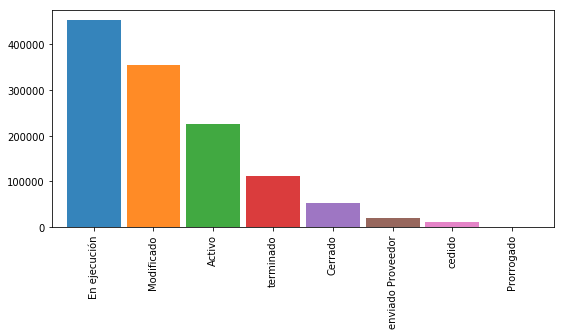

In [21]:
df_resumen.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.9,               # nivel de transparencia
             width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

In [ ]:
#df_Valores=df_Final.groupby(['departamento'])['valor_del_contrato'].agg(['sum','count'])
#df_Valores

## Trabajando con un subconjunto de la base

In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importamos archivo excel
Base= pd.read_excel('C:/Users/Marlon/Desktop/MAESTRIA/MAESTRIA/2do Semestre/3. Seminario de programación/SECOPTALLERCOLUMNAS.xlsx')


In [4]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(Base)

In [5]:
# Conocemos cuantos datos (filas y columnas), tiene nuestra base de datos
results_df.shape

(1048575, 8)

In [10]:
print(results_df)

                                             NombreEntidad  \
0        SENA REGIONAL ANTIOQUIA Grupo Administrativo CRNR   
1         SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E   
2                         MUNICIPIO DE SANTA ROSA DE CABAL   
3        PARQUES NACIONALES NATURALES DE COLOMBIA - DIR...   
4        DIRECCION DE SANIDAD EJERCITO DISPENSARIO MÉDI...   
...                                                    ...   
1048570  COMANDO DE RECLUTAMIENTO Y CONTROL RESERVAS DE...   
1048571  SANTIAGO DE CALI DISTRITO ESPECIAL - SECRETARI...   
1048572                       MUNICIPIO DE PEREIRA-OFICIAL   
1048573                       MUNICIPIO DE ARMENIA QUINDIO   
1048574  ALCALDÍA DEL DISTRITO TURÍSTICO Y CULTURAL DE ...   

                       Departamento               Ciudad  \
0                         Antioquia               Caldas   
1        Distrito Capital de Bogotá               Bogotá   
2                         Risaralda  Santa Rosa De Cabal   
3              

Ahora veremos una descripcion informativa de lo que contiene la base de datos:

In [6]:
display("Primeros 3 registros",results_df.head(3))
display("3 últimos registros",results_df.tail(3))
display("Columnas:",results_df.columns)
display("Índices:",results_df.index)
display("Tipos de registros en el DataFrame",results_df.dtypes)
display("Muestra aleatoria de 3 registros",results_df.sample(3))
display("dimensión",results_df.shape)

'Primeros 3 registros'

,NombreEntidad,Departamento,Ciudad,Sector,EstadoContrato,TipoDocProveedor,ValorContrato,SaldoCDP
0,SENA REGIONAL ANTIOQUIA Grupo Administrativo CRNR,Antioquia,Caldas,Trabajo,terminado,Cédula de Ciudadanía,36962200.0,3.835700e+07
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,Distrito Capital de Bogotá,Bogotá,Salud y Protección Social,terminado,Cédula de Ciudadanía,3100000.0,3.300000e+09
2,MUNICIPIO DE SANTA ROSA DE CABAL,Risaralda,Santa Rosa De Cabal,Servicio Público,En ejecución,Cédula de Ciudadanía,7572000.0,8.000000e+06


'3 últimos registros'

,NombreEntidad,Departamento,Ciudad,Sector,EstadoContrato,TipoDocProveedor,ValorContrato,SaldoCDP
1048572,MUNICIPIO DE PEREIRA-OFICIAL,Risaralda,Pereira,Servicio Público,Activo,Cédula de Ciudadanía,3308000.0,0.0
1048573,MUNICIPIO DE ARMENIA QUINDIO,Quindío,Armenia,Servicio Público,En ejecución,Cédula de Ciudadanía,11550000.0,11550000.0
1048574,ALCALDÍA DEL DISTRITO TURÍSTICO Y CULTURAL DE ...,Bolívar,Cartagena,No aplica/No pertenece,En ejecución,Cédula de Ciudadanía,4500000.0,9000000.0


'Columnas:'

Index(['NombreEntidad', 'Departamento', 'Ciudad', 'Sector', 'EstadoContrato',
       'TipoDocProveedor', 'ValorContrato', 'SaldoCDP'],
      dtype='object')

'Índices:'

RangeIndex(start=0, stop=1048575, step=1)

'Tipos de registros en el DataFrame'

NombreEntidad        object
Departamento         object
Ciudad               object
Sector               object
EstadoContrato       object
TipoDocProveedor     object
ValorContrato       float64
SaldoCDP            float64
dtype: object

'Muestra aleatoria de 3 registros'

,NombreEntidad,Departamento,Ciudad,Sector,EstadoContrato,TipoDocProveedor,ValorContrato,SaldoCDP
212758,ESAP SEDE CENTRAL (Cuenta Oficial),Distrito Capital de Bogotá,Bogotá,Servicio Público,Modificado,Cédula de Ciudadanía,18756603.0,12504402.0
138532,ARMADA NACIONAL BASE NAVAL No. 6 ARC BOGOTA,Distrito Capital de Bogotá,Bogotá,defensa,Borrador,NIT,184722450.0,597847300.0
443757,DANE - TERRITORIAL CENTRO OCCIDENTE,Caldas,Manizales,Servicio Público,Modificado,Cédula de Ciudadanía,20243724.0,205811194.0


'dimensión'

(1048575, 8)

Para el analisis solo se tendran en cuenta los contrato que no esten en los estados de: 
+ 1.En aprobación
+ 2.Suspendido
+ 3.Borrador
+ 4.Suspendido
    

In [7]:
print(results_df["EstadoContrato"].value_counts())

En ejecución         363774
Modificado           284415
Activo               181560
terminado             89810
Borrador              51887
Cerrado               42245
enviado Proveedor     16218
En aprobación          9130
cedido                 8298
Suspendido             1114
Prorrogado              115
Name: EstadoContrato, dtype: int64


In [8]:
results_df1= results_df.query("EstadoContrato!='En aprobación'")
results_df2= results_df1.query("EstadoContrato!='Suspendido'")
results_df3= results_df2.query("EstadoContrato!='Borrador'")
results_df4= results_df3.query("EstadoContrato!='enviado Proveedor'") #repetido
results_df4.shape #sumatoria de los 4 estados

(970226, 8)

In [9]:
df_resumen=results_df4["EstadoContrato"].value_counts()
df_resumen # resumen excluyendo  estados del contrato

En ejecución    363774
Modificado      284415
Activo          181560
terminado        89810
Cerrado          42245
cedido            8298
Prorrogado         115
Name: EstadoContrato, dtype: int64

En la gráfica se evidencia que un gran procentaje de los contratos se encuentran en ejecucion, y un minomo porcentaje se encuentran prorrogrados

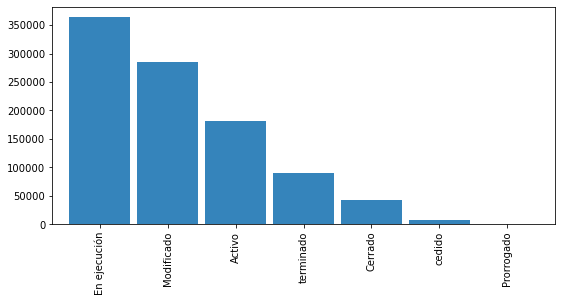

In [10]:
df_resumen.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.9,               # nivel de transparencia
             width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

Para el ejercicio, se analizó la Información de los contratos registrados en SECOP II desde su lanzamiento de contratos electrónicos, que son proporcionados por Datos proporcionados por Colombia Compra Eficiente, donde se determinaron 67 variables y 1.048.575 registros. 
De esta manera, se analizarán las siguientes variables: (i) Departamento en el cual se registró la entidad del estado que publica el contrato, (ii) Sector - Sector de la economía de la entidad del estado que publica el contrato,  (iii) Estado del contrato, frente a su ejecución, firma o liquidación, (iv) Valor total del contrato, (v) Saldo del CDP asignado al proceso y al contrato y (vi) al final se determinó una variables denominada “diferencia” donde se logra determinar del CDP asignado cuanto de estimo efectivamente para el contrato. 


In [11]:
Sector_df=print(results_df["Sector"].value_counts())
Sector_df

Servicio Público                                      196265
Salud y Protección Social                             151468
No aplica/No pertenece                                106574
defensa                                                88166
Trabajo                                                58343
Inclusión Social y Reconciliación                      53764
Educación Nacional                                     49287
Ambiente y Desarrollo Sostenible                       44449
Cultura                                                37702
Información Estadística                                36387
Transporte                                             30736
Ley de Justicia                                        30269
deportes                                               24824
Planeación                                             23295
Hacienda y Crédito Público                             19486
agricultura                                            18598
Industria               

De la información

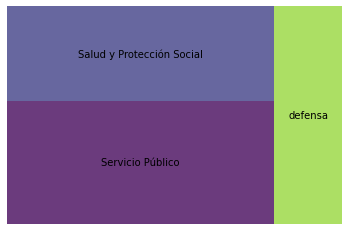

In [31]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# Create a data frame with fake data
df = pd.DataFrame({'results_df':[196265,151468, 88166], 'group':['Servicio Público','Salud y Protección Social','defensa'] })

# plot it
squarify.plot(sizes=df['results_df'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

Los sectores que mas contratos tienen a nivel Colombia son los de servicios públicos, salud y protección soscial y defenesa

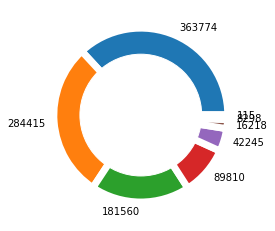

In [41]:
# library
import matplotlib.pyplot as plt

# create data
df_resumen
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(df_resumen, labels=df_resumen, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [12]:
df_resumen.index.isin(df_resumen.index)

array([ True,  True,  True,  True,  True,  True,  True])

In [14]:
#Resumen del comportamiento del valor del contrato 
df_resumen.describe()

count         7.000000
mean     138602.428571
std      142379.986078
min         115.000000
25%       25271.500000
50%       89810.000000
75%      232987.500000
max      363774.000000
Name: EstadoContrato, dtype: float64